It you wanted to just look at the raw python. Go [here](https://github.com/click-here/Names/blob/master/historical%20name%20variance.py)

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
file_loc = './data'
files = [x for x in os.listdir(file_loc)]

#### Read in data files specifying dtype of the count column for later math.  

In [3]:
frames = []
for file in files:
    df = pd.read_csv(os.path.join(file_loc,file),header=None,dtype={2:np.int32})
    df = df.rename(columns={0:'name',1:'gender',2:'count'})
    df['year'] = np.int32(file[3:7])
    frames.append(df)
df = pd.concat(frames)

#### Now groupby `year` and `gender` while performing an aggregation on the `count` column of both `max` and `sum`. By reseting the index we convert it from a groupby object into a dataframe.  Additionally, the double aggregation creates a 2 level header so we clean that up by redeclaring our column names.

In [4]:
df2 = df.groupby(['year','gender']).agg({'count':['max','sum']}).reset_index()
df2.columns = ['year','gender','count','sum']

#### `df` which has all of our csv files at `1891894` rows is being kept to map back in the names. 

In [5]:
print(df.shape);df.head()

(1891894, 4)


,name,gender,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


#### `df2` as you can see has been grouped by `year` and `gender`. Notice its `shape` and appearance. 

In [6]:
print('%s rows by %s columns'%(df2.shape[0],df2.shape[1]));df2.head()

274 rows by 4 columns


,year,gender,count,sum
0,1880,F,7065,90992
1,1880,M,9655,110491
2,1881,F,6919,91953
3,1881,M,8769,100743
4,1882,F,8148,107847


#### Below we take `df2` and merge on 3 columns (`gender`,`year`,`count`). The join type is inner. Check out the [docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html)

In [7]:
df2 = df2.merge(df,on=['gender','year','count'],how='inner')

#### Define a variance column into existence by taking `count` divided by `sum`

In [8]:
df2['variance'] = df2['count']/df2['sum']

In [9]:
df3 = df2[['year','gender','variance']].set_index('year')

Above we created a third dataframe and set the index to `year` to aid our plotting.

In [10]:
df3.head()

,gender,variance
year,,
1880,F,0.077644
1880,M,0.087383
1881,F,0.075245
1881,M,0.087043
1882,F,0.075551


In [11]:
chart_group = df3.groupby('gender')['variance']

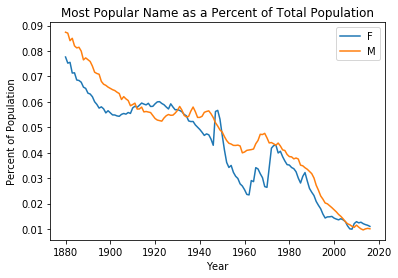

In [12]:
chart_group.plot()
plt.legend()
plt.title('Most Popular Name as a Percent of Total Population')
plt.xlabel('Year')
plt.ylabel('Percent of Population')
plt.show()